In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np
import cartopy.crs as ccrs

In [33]:
data = gpd.read_file("data/gdp_pop_non_nuts3.geojson")

In [34]:

data["gdp_norm"] = data["gdp"] / data["gdp"].sum()
data["pop_norm"] = data["pop"] / data["pop"].sum()
data["load_factor"] = 0.6*data["gdp_norm"] + 0.4*data["pop_norm"]

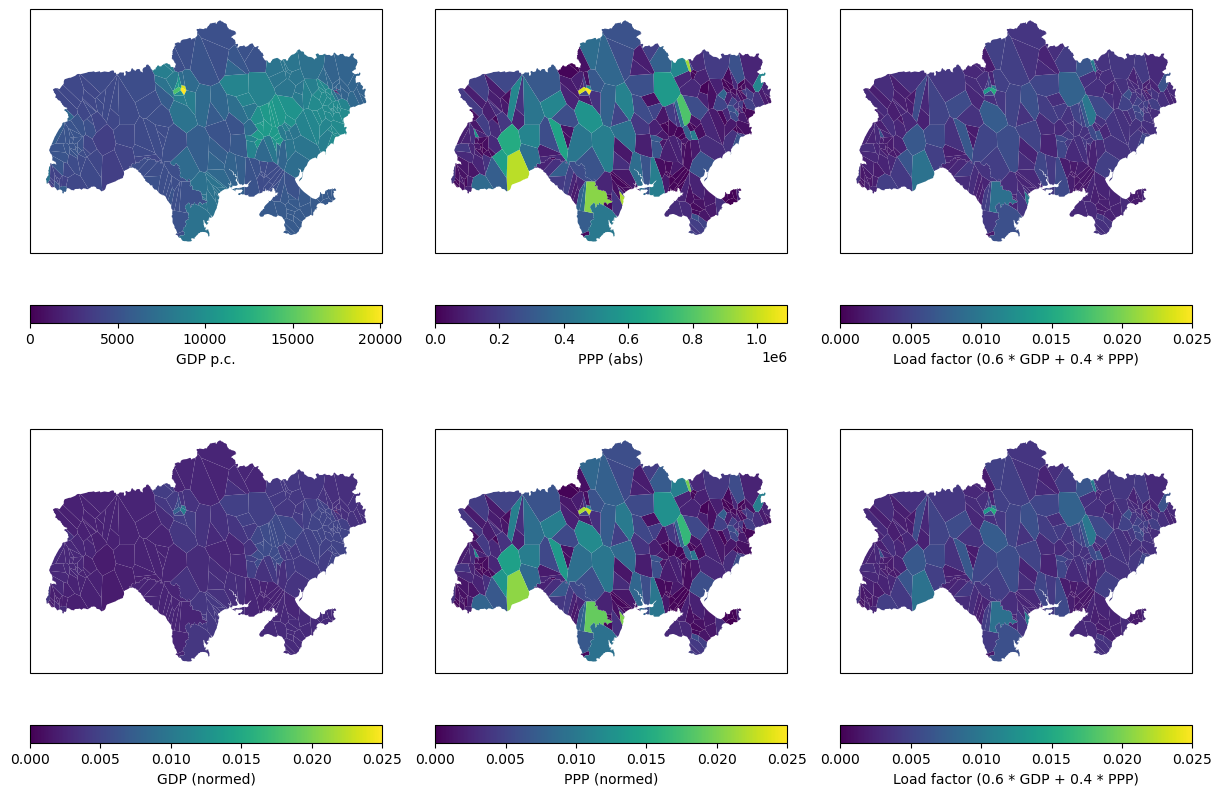

In [35]:
# plot heatmap of load factor
crs = ccrs.AlbersEqualArea()

# colormap from 0 to 0.1 (0.1 is the maximum value)
cmap = plt.get_cmap("viridis")
norm = colors.Normalize(vmin=0, vmax=0.025)

# remove white space between subplots
# projection to equal earth
fig, ax = plt.subplots(2, 3, figsize=(15, 10), subplot_kw={"projection": crs}, gridspec_kw={"wspace": 0.15})
data.to_crs(crs.proj4_init).plot(column="gdp", ax=ax[0][0], legend=True, legend_kwds={"label": "GDP p.c.", "orientation": "horizontal"}, cmap=cmap)
data.to_crs(crs.proj4_init).plot(column="pop", ax=ax[0][1], legend=True, legend_kwds={"label": "PPP (abs)", "orientation": "horizontal"}, cmap=cmap)
data.to_crs(crs.proj4_init).plot(column="load_factor", ax=ax[0][2], legend=True, legend_kwds={"label": "Load factor (0.6 * GDP + 0.4 * PPP)", "orientation": "horizontal"}, cmap=cmap, norm=norm)
data.to_crs(crs.proj4_init).plot(column="gdp_norm", ax=ax[1][0], legend=True, legend_kwds={"label": "GDP (normed)", "orientation": "horizontal"}, cmap=cmap, norm=norm)
data.to_crs(crs.proj4_init).plot(column="pop_norm", ax=ax[1][1], legend=True, legend_kwds={"label": "PPP (normed)", "orientation": "horizontal"}, cmap=cmap, norm=norm)
data.to_crs(crs.proj4_init).plot(column="load_factor", ax=ax[1][2], legend=True, legend_kwds={"label": "Load factor (0.6 * GDP + 0.4 * PPP)", "orientation": "horizontal"}, cmap=cmap, norm=norm)
plt.show()

fig.savefig("heatmap.png", dpi=150, bbox_inches="tight")